# Importing models and dataset

In [1]:
#Import nescesarry models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import gender_guesser.detector as gender

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(io = file)

# Exploration of the dataset

In [2]:
# Checking amount of rows and columns
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
# Checking the names of the features 
chef.keys()

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [4]:
# Labeling them all lower case
chef_cap = chef.rename(str.capitalize, axis='columns')

# Rechecking the names of the features 
chef_cap.keys()

Index(['Revenue', 'Cross_sell_success', 'Name', 'Email', 'First_name', 'Family_name', 'Total_meals_ordered', 'Unique_meals_purch', 'Contacts_w_customer_service', 'Product_categories_viewed', 'Avg_time_per_site_visit', 'Mobile_number', 'Cancellations_before_noon', 'Cancellations_after_noon', 'Tastes_and_preferences', 'Pc_logins', 'Mobile_logins', 'Weekly_plan', 'Early_deliveries', 'Late_deliveries', 'Package_locker', 'Refrigerated_locker', 'Avg_prep_vid_time', 'Largest_order_size', 'Master_classes_attended', 'Median_meal_rating', 'Avg_clicks_per_visit', 'Total_photos_viewed'], dtype='object')

In [5]:
# Relabeling Laregest Order Size 
chef_eda = chef_cap.rename(columns={"Largest_order_size" : "Avg_meals_pc"})

# Checking the first rows of the DataFrame
chef_eda.head(n=5)

,Revenue,Cross_sell_success,Name,Email,First_name,Family_name,Total_meals_ordered,Unique_meals_purch,Contacts_w_customer_service,Product_categories_viewed,Avg_time_per_site_visit,Mobile_number,Cancellations_before_noon,Cancellations_after_noon,Tastes_and_preferences,Pc_logins,Mobile_logins,Weekly_plan,Early_deliveries,Late_deliveries,Package_locker,Refrigerated_locker,Avg_prep_vid_time,Avg_meals_pc,Master_classes_attended,Median_meal_rating,Avg_clicks_per_visit,Total_photos_viewed
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [6]:
# Checking information about each variable
chef_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Revenue                      1946 non-null   float64
 1   Cross_sell_success           1946 non-null   int64  
 2   Name                         1946 non-null   object 
 3   Email                        1946 non-null   object 
 4   First_name                   1946 non-null   object 
 5   Family_name                  1899 non-null   object 
 6   Total_meals_ordered          1946 non-null   int64  
 7   Unique_meals_purch           1946 non-null   int64  
 8   Contacts_w_customer_service  1946 non-null   int64  
 9   Product_categories_viewed    1946 non-null   int64  
 10  Avg_time_per_site_visit      1946 non-null   float64
 11  Mobile_number                1946 non-null   int64  
 12  Cancellations_before_noon    1946 non-null   int64  
 13  Cancellations_afte

In [7]:
# Checking missing values
print(f"""Total Missing values:
--------------------------------------------
There are {chef_eda.isnull().sum().sum()} missing values, that represent 
{(chef_eda.isnull().sum().sum()/(1946*28)).round(decimals=4)*100} % of the data.
""")

print("""Columns with missing values:
---------------------------------------------""")
chef_eda.isnull().sum()

Total Missing values:
--------------------------------------------
There are 47 missing values, that represent 
0.09 % of the data.

Columns with missing values:
---------------------------------------------


Revenue                         0
Cross_sell_success              0
Name                            0
Email                           0
First_name                      0
Family_name                    47
Total_meals_ordered             0
Unique_meals_purch              0
Contacts_w_customer_service     0
Product_categories_viewed       0
Avg_time_per_site_visit         0
Mobile_number                   0
Cancellations_before_noon       0
Cancellations_after_noon        0
Tastes_and_preferences          0
Pc_logins                       0
Mobile_logins                   0
Weekly_plan                     0
Early_deliveries                0
Late_deliveries                 0
Package_locker                  0
Refrigerated_locker             0
Avg_prep_vid_time               0
Avg_meals_pc                    0
Master_classes_attended         0
Median_meal_rating              0
Avg_clicks_per_visit            0
Total_photos_viewed             0
dtype: int64

In [8]:
# Since we will not be using Family_name in analyisis, Drop column 
chef_new = chef_eda.drop(['Family_name'], axis = 1)

# Making sure all missing values have been taken care of
chef_new.isnull().any().any()

False

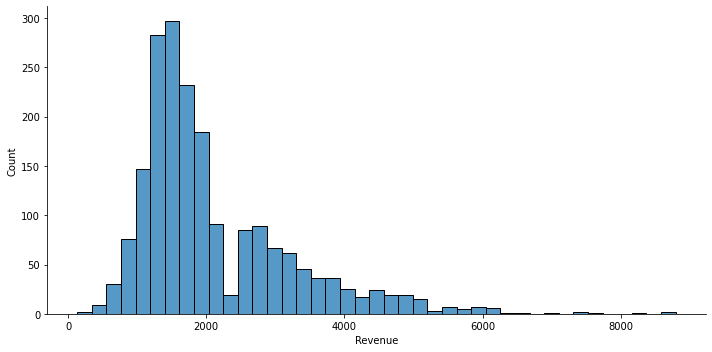

In [9]:
# Developing a histogram of our target (Revenue) using DISPLOT
sns.displot(data   = chef_new,
            x     = 'Revenue',
            height = 5,
            aspect = 2)


# Displaying and saving the histogram
plt.savefig('./analysis_images/Revenue Histogram.png')
plt.show()

In [10]:
# Log transforming Revenue and saving it to the dataset
chef_new['log_Revenue'] = np.log10(chef_new['Revenue'])

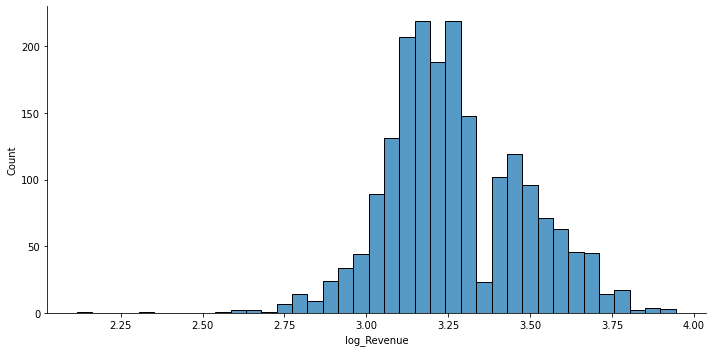

In [11]:
# Developing a histogram of our target (log_Revenue) using DISPLOT
sns.displot(data   = chef_new,
            x     = 'log_Revenue',
            height = 5,
            aspect = 2)


# Displaying and saving the histogram
plt.savefig('./analysis_images/log_Revenue Histogram.png')
plt.show()

In [12]:
# Descriptive statistics for Numeric data
chef_new.describe(include = 'number').round(2)

,Revenue,Cross_sell_success,Total_meals_ordered,Unique_meals_purch,Contacts_w_customer_service,Product_categories_viewed,Avg_time_per_site_visit,Mobile_number,Cancellations_before_noon,Cancellations_after_noon,Tastes_and_preferences,Pc_logins,Mobile_logins,Weekly_plan,Early_deliveries,Late_deliveries,Package_locker,Refrigerated_locker,Avg_prep_vid_time,Avg_meals_pc,Master_classes_attended,Median_meal_rating,Avg_clicks_per_visit,Total_photos_viewed,log_Revenue
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,3.27
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.21
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,2.12
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,3.13
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,3.24
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,3.43
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,3.94


In [13]:
%%html
<style>
table {float:left}
</style>

# Feature Engineering


Continuous                    |  Interval/Counts              |  Categorical
:---------------------------  | :---------------------------  | :---------------------------
Revenue (target/y-variable)   | Cross_sell_success            | Name
Total_meals_ordered           | Product_categories_viewed     | Email
Unique_meals_purch            | Mobile_number                 | First_name
Contacts_w_customer_service   | Cancellations_before_noon     | Family_name
Avg_time_per_site_visit       | Cancellations_after_noon      | 
Early_deliveries              | Tastes_and_preferences        |   
Late_deliveries               | Pc_logins                     |   
Avg_prep_vid_time             | Mobile_logins                 |
Avg_meals_pc                  | Weekly_plan                   |
Avg_clicks_per_visit          | Package_locker                |
Total_photos_viewed           | Refrigerated_locker           |
                              | Master_classes_attended       |
                              | Median_meal_rating            |

## Continuous Base Modeling

In [14]:
# Creating a list of continuous features (including Revenue)
continuous_data = ['Revenue','Total_meals_ordered','Unique_meals_purch', \
                   'Contacts_w_customer_service','Avg_time_per_site_visit', \
                   'Early_deliveries', 'Late_deliveries','Avg_prep_vid_time',\
                   'Avg_meals_pc','Avg_clicks_per_visit','Total_photos_viewed']


# Developing a correlation matrix based on continuous features
chef_new_corr = chef_new[continuous_data].corr(method = 'pearson')


# Filtering the results to only show correlations with Revenue
chef_new_corr.loc[ : ,'Revenue'].round(decimals = 2).sort_values(ascending = False)

Revenue                        1.00
Avg_prep_vid_time              0.64
Total_meals_ordered            0.60
Total_photos_viewed            0.47
Avg_meals_pc                   0.44
Avg_time_per_site_visit        0.14
Contacts_w_customer_service    0.10
Early_deliveries              -0.00
Late_deliveries               -0.01
Unique_meals_purch            -0.06
Avg_clicks_per_visit          -0.55
Name: Revenue, dtype: float64

In [15]:
# Instantiate a model object
lm_cont = smf.ols(formula = """Revenue ~ Total_meals_ordered +
                                         Unique_meals_purch + 
                                         Contacts_w_customer_service +
                                         Avg_time_per_site_visit +
                                         Early_deliveries +
                                         Late_deliveries +
                                         Avg_prep_vid_time +
                                         Avg_meals_pc +
                                         Avg_clicks_per_visit +
                                         Total_photos_viewed""",
                  data = chef_new)


# Fit the data into the model object
results_cont = lm_cont.fit()


# Analyze the summary output
print(results_cont.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     311.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:53:58   Log-Likelihood:                -15522.
No. Observations:                1946   AIC:                         3.107e+04
Df Residuals:                    1935   BIC:                         3.113e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [16]:
# Instantiate a model object
lm_best = smf.ols(formula = """Revenue ~ Total_meals_ordered +
                                         Unique_meals_purch + 
                                         Contacts_w_customer_service +
                                         Avg_prep_vid_time +
                                         Avg_meals_pc +
                                         Avg_clicks_per_visit +
                                         Total_photos_viewed""",
                  data = chef_new)


# Fit the data into the model object
results_best = lm_best.fit()


# Analyze the summary output
print(results_best.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     444.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:53:58   Log-Likelihood:                -15524.
No. Observations:                1946   AIC:                         3.106e+04
Df Residuals:                    1938   BIC:                         3.111e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [17]:
# Instantiate a model object
lm_best_log = smf.ols(formula = """log_Revenue ~ Total_meals_ordered +
                                             Unique_meals_purch + 
                                             Contacts_w_customer_service +
                                             Avg_prep_vid_time +
                                             Avg_meals_pc +
                                             Avg_clicks_per_visit +
                                             Total_photos_viewed""",
                  data = chef_new)


# Fit the data into the model object
results_log = lm_best_log.fit()


# Analyze the summary output
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     470.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:53:58   Log-Likelihood:                 1225.2
No. Observations:                1946   AIC:                            -2434.
Df Residuals:                    1938   BIC:                            -2390.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef_new['Total_meals_ordered'],
                y = chef_new['Revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef_new['Unique_meals_purch'],
                y = chef_new['Revenue'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef_new['Contacts_w_customer_service'],
                y = chef_new['Revenue'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef_new['Avg_time_per_site_visit'],
                y = chef_new['Revenue'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef Scatterplots 1 of 3.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef_new['Avg_prep_vid_time'],
                y = chef_new['Revenue'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Playing Time of a Meal Prep Video ')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef_new['Avg_meals_pc'],
                y = chef_new['Revenue'],
                color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Meals Ordered per Customer')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef_new['Avg_clicks_per_visit'],
                y = chef_new['Revenue'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Clicks per Visit')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef_new['Total_photos_viewed'],
                y = chef_new['Revenue'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Revenue')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef Scatterplots 2 of 3.png')
plt.show()

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

#developing a scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x = chef_new['Early_deliveries'],
                y = chef_new['Revenue'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################

#developing a scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x = chef_new['Late_deliveries'],
                y = chef_new['Revenue'],
                color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################

#developing a scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x = chef_new['Pc_logins'],
                y = chef_new['Revenue'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')

########################

#developing a scatterplot
plt.subplot(4, 2, 4)
sns.scatterplot(x = chef_new['Mobile_logins'],
                y = chef_new['Revenue'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef Scatterplots 3 of 3.png')
plt.show()

In [ ]:
# Setting figure size
fig, ax = plt.subplots(figsize = (5, 3))

# Creating the plot
tot_plot = sns.scatterplot(x = chef_new['Total_meals_ordered'],
                            y = chef_new['Revenue'],
                            color = 'g')

# Setting the x_scale
tot_plot.set(xlim = (0,30))

# Showing and saving the plot
plt.savefig('./analysis_images/Total Meals Ordered - Zoomed.png')
plt.show()

In [ ]:
# Setting figure size
fig, ax = plt.subplots(figsize = (5, 3))

# Creating the plot
cont_plot = sns.scatterplot(x = chef_new['Contacts_w_customer_service'],
                            y = chef_new['Revenue'],
                            color = 'r')

# Setting the x_scale
cont_plot.set(xlim = (0,12.5))

# Showing and saving the plot
plt.savefig('./analysis_images/Contacts with CS - Zoomed.png')
plt.show()

In [18]:
# Dummy variables for inregulare plots
chef_new['Ordered_regularly']                  = 0
chef_new['Regular_contact_w_customer_service'] = 0
chef_new['has_Viewed_photos']                  = 0
chef_new['On_time_delivery']                   = 0
chef_new['has_Logins']                         = 0 
chef_new['has_Unique_meals_purch']             = 0

# Start for-loop
for index, value in chef_new.iterrows():
    
    # Ordered_regularly (x >= 20)
    if chef_new.loc[index, 'Total_meals_ordered'] >= 20:
        chef_new.loc[index, 'Ordered_regularly'] = 1
        
    # Regular_contact (x > 10)
    if chef_new.loc[index, 'Contacts_w_customer_service'] > 10:
        chef_new.loc[index, 'Regular_contact_w_customer_service'] = 1
    
    # Has viewed photos 
    if chef_new.loc[index, 'Total_photos_viewed'] > 0:
        chef_new.loc[index, 'has_Viewed_photos'] = 1
        
    # On-time delivery 
    if chef_new.loc[index, 'Early_deliveries'] == 0 and chef_new.loc[index, 'Late_deliveries'] == 0:
        chef_new.loc[index, 'On_time_delivery'] = 1
        
    # Has logins
        if chef_new.loc[index, 'Mobile_logins'] > 0:
            chef_new.loc[index, 'has_Logins'] = 1
            
    # Has Unique meals purchased
        if chef_new.loc[index, 'Unique_meals_purch'] > 1:
            chef_new.loc[index, 'has_Unique_meals_purch'] = 1

In [19]:
# Total Clicks per Visit
chef_new['Total_clicks_per_visit'] = chef_new['Avg_clicks_per_visit'] * \
                                    (chef_new['Pc_logins'] + chef_new['Mobile_logins'])

In [ ]:
# Setting figure size
fig, ax = plt.subplots(figsize = (8, 5))

# Creating the plot
tot_c_plot = sns.scatterplot(x = chef_new['Total_clicks_per_visit'],
                             y = chef_new['Revenue'],
                             color = 'y')
# Showing and saving the plot
plt.savefig('./analysis_images/Total clicks per visit.png')
plt.show()

### Outlier Tresholds

In [20]:
def outlier_threshold (variable):
    # First quartile (Q1) 
    Q3, Q1 = np.percentile(variable, [75 , 25])
  
    # Interquaritle range (IQR) 
    IQR = Q3 - Q1
    
    # Calculate outlier_rule
    outlier_rule = 1.5*(IQR)
    
    # Calculate upper outliers
    outlier_hi = Q3 + outlier_rule
    outlier_lo = Q1 - outlier_rule
    
    # Print outlier treshold
    print(outlier_hi, outlier_lo)

In [21]:
# Total_meals_ordered
outlier_threshold(variable = chef_new['Total_meals_ordered'])

# Avg_time_per_site_visit
outlier_threshold(variable = chef_new['Avg_time_per_site_visit'])

# Early_deliveries
outlier_threshold(variable = chef_new['Early_deliveries'])

# Late_deliveries
outlier_threshold(variable = chef_new['Late_deliveries'])

# Avg_prep_vid_time
outlier_threshold(variable = chef_new['Avg_prep_vid_time'])

# Avg_meals_pc
outlier_threshold(variable = chef_new['Avg_meals_pc'])

# Total_photos_viewed
outlier_threshold(variable = chef_new['Total_photos_viewed'])

179.0 -45.0
185.21875 4.0687500000000085
7.5 -4.5
8.5 -3.5
262.8375000000001 25.337499999999963
8.0 0.0
435.0 -261.0


In [22]:
# Dummy variables for outlier tresholds 
out_Total_meals_ordered         = 179
out_Avg_time_psv_hi             = 185
out_Avg_time_psv_lo             = 4.0
out_Early_deliveries            = 7.5
out_Late_deliveries             = 8.5
out_Avg_prep_vid_time_hi        = 262.8
out_Avg_prep_vid_time_lo        = 25.3
out_Avg_meals_pc                = 8
out_Total_photos_viewed         = 435

# Start for-loop
for index, value in chef_new.iterrows():
        
    # out_Total_meals_ordered 
    if chef_new.loc[index, 'Total_meals_ordered'] > out_Total_meals_ordered:
        chef_new.loc[index, 'out_Total_meals_ordered'] = 1
    else:
        chef_new.loc[index, 'out_Total_meals_ordered'] = 0
    
    # out_Avg_time_per_site_visit
    if chef_new.loc[index, 'Avg_time_per_site_visit'] > out_Avg_time_psv_hi:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 1  
    elif chef_new.loc[index, 'Avg_time_per_site_visit'] < out_Avg_time_psv_lo:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 1 
    else:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 0
    
    # out_Early_deliveries
    if chef_new.loc[index, 'Early_deliveries'] > out_Early_deliveries:
        chef_new.loc[index, 'out_Early_deliveries'] = 1
    else:
        chef_new.loc[index, 'out_Early_deliveries'] = 0
    
    # out_Late_deliveries
    if chef_new.loc[index, 'Late_deliveries'] > out_Late_deliveries:
        chef_new.loc[index, 'out_Late_deliveries'] = 1
    else:
        chef_new.loc[index, 'out_Late_deliveries'] = 0
        
    # out_Avg_prep_vid_time
    if chef_new.loc[index, 'Avg_prep_vid_time'] > out_Avg_prep_vid_time_hi:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 1
    elif chef_new.loc[index, 'Avg_prep_vid_time'] < out_Avg_prep_vid_time_lo:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 1
    else:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 0
        
    # out_Avg_meals_pc
    if chef_new.loc[index, 'Avg_meals_pc'] > out_Avg_meals_pc:
        chef_new.loc[index, 'out_Avg_meals_pc'] = 1
    else:
        chef_new.loc[index, 'out_Avg_meals_pc'] = 0
        
    # out_Total_photos_viewed
    if chef_new.loc[index, 'Total_photos_viewed'] > out_Total_photos_viewed:
        chef_new.loc[index, 'out_Total_photos_viewed'] = 1
    else:
        chef_new.loc[index, 'out_Total_photos_viewed'] = 0

In [ ]:
# Creating UDF for histograms
def continuous_histograms(data, x_var):
    sns.displot(data   = data,
                x      = x_var, 
                height = 3, 
                aspect = 2)
    plt.tight_layout()
    plt.savefig('./analysis_images/Continuous Histograms.png')
    plt.show()

In [ ]:
# calling the function for Total_meals_ordered
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_meals_ordered')

# calling the function for Unique_meals_purch
continuous_histograms(data   = chef_new,
                      x_var  = 'Unique_meals_purch')

# calling the function for Contacts_w_customer_service
continuous_histograms(data   = chef_new,
                      x_var  = 'Contacts_w_customer_service')

# calling the function for Avg_time_per_site_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_time_per_site_visit')

# calling the function for Early_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'Early_deliveries')

# calling the function for Late_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'Late_deliveries')

# calling the function for Avg_prep_vid_time
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_prep_vid_time')

# calling the function for Avg_meals_pc
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_meals_pc')

# calling the function for Avg_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_clicks_per_visit')

# calling the function for Total_photos_viewed
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_photos_viewed')

# calling the function for Total_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_clicks_per_visit')

In [23]:
# log transforming Revenue and saving it to the dataset
chef_new['log_Total_meals_ordered'] = np.log10(chef_new['Total_meals_ordered'])
chef_new['log_Unique_meals_purch'] = np.log10(chef_new['Unique_meals_purch'])
chef_new['log_Contacts_w_customer_service'] = np.log10(chef_new['Contacts_w_customer_service'])
chef_new['log_Avg_time_per_site_visit'] = np.log10(chef_new['Avg_time_per_site_visit'])
chef_new['log_Early_deliveries'] = np.log10(chef_new['Early_deliveries']+0.1)
chef_new['log_Late_deliveries'] = np.log10(chef_new['Late_deliveries']+0.1)
chef_new['log_Avg_prep_vid_time'] = np.log10(chef_new['Avg_prep_vid_time'])
chef_new['log_Avg_meals_pc'] = np.log10(chef_new['Avg_meals_pc'])
chef_new['log_Avg_clicks_per_visit'] = np.log10(chef_new['Avg_clicks_per_visit'])
chef_new['log_Total_photos_viewed'] = np.log10(chef_new['Total_photos_viewed']+0.1)
chef_new['log_Total_clicks_per_visit'] = np.log10(chef_new['Total_clicks_per_visit'])

In [ ]:
# calling the function for Total_meals_ordered
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_meals_ordered')

# calling the function for Unique_meals_purch
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Unique_meals_purch')

# calling the function for Contacts_w_customer_service
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Contacts_w_customer_service')

# calling the function for Avg_time_per_site_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_time_per_site_visit')

# calling the function for Early_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Early_deliveries')

# calling the function for Late_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Late_deliveries')

# calling the function for Avg_prep_vid_time
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_prep_vid_time')

# calling the function for Avg_meals_pc
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_meals_pc')

# calling the function for Avg_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_clicks_per_visit')

# calling the function for Total_photos_viewed
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_photos_viewed')

# calling the function for Total_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_clicks_per_visit')


## Interval / Count Engineering

In [24]:
# Creating a list of continuous features (including Revenue)
interval_data = ['Revenue','Cross_sell_success','Product_categories_viewed',\
                 'Mobile_number','Cancellations_before_noon','Cancellations_after_noon',\
                 'Tastes_and_preferences','Pc_logins','Mobile_logins','Weekly_plan',\
                 'Package_locker','Refrigerated_locker',\
                 'Master_classes_attended','Median_meal_rating']

# Developing a correlation matrix based on continuous features
chef_new_corr_int = chef_new[interval_data].corr(method = 'pearson')

# Filtering the results to only show correlations with Revenue
chef_new_corr_int.loc[ : ,'Revenue'].round(decimals = 2).sort_values(ascending = False)

Revenue                      1.00
Median_meal_rating           0.61
Master_classes_attended      0.45
Mobile_number                0.03
Product_categories_viewed    0.03
Pc_logins                    0.02
Weekly_plan                  0.01
Tastes_and_preferences       0.01
Cancellations_before_noon    0.01
Refrigerated_locker         -0.00
Cross_sell_success           0.00
Package_locker              -0.01
Mobile_logins               -0.02
Cancellations_after_noon    -0.04
Name: Revenue, dtype: float64

In [25]:
# Transform Count variables that are not 0/1 into log
chef_new['log_Product_categories_viewed'] = np.log10(chef_new['Product_categories_viewed'])
chef_new['log_Pc_logins'] = np.log10(chef_new['Pc_logins'])
chef_new['log_Median_meal_rating'] = np.log10(chef_new['Median_meal_rating'])

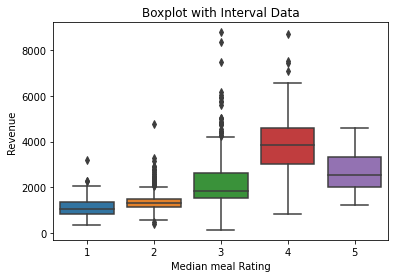

In [26]:
# Developing a boxplot
sns.boxplot(x    = 'Median_meal_rating',
            y    = 'Revenue',
            data = chef_new)


# Titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Median meal Rating')
plt.ylabel(ylabel = 'Revenue')


# Displaying and saving the plot
plt.savefig('./analysis_images/Median Meal Rating boxplot.png')
plt.show()

In [ ]:
# Create Correlation and store in log_corr
log_corr = chef_new.loc[ : , ['Median_meal_rating',
                             'log_Median_meal_rating',
                             'Revenue',
                             'log_Revenue']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# Show log_corr
log_corr.loc[ ['Median_meal_rating', 'log_Median_meal_rating'],
              ['Revenue', 'log_Revenue']   ]

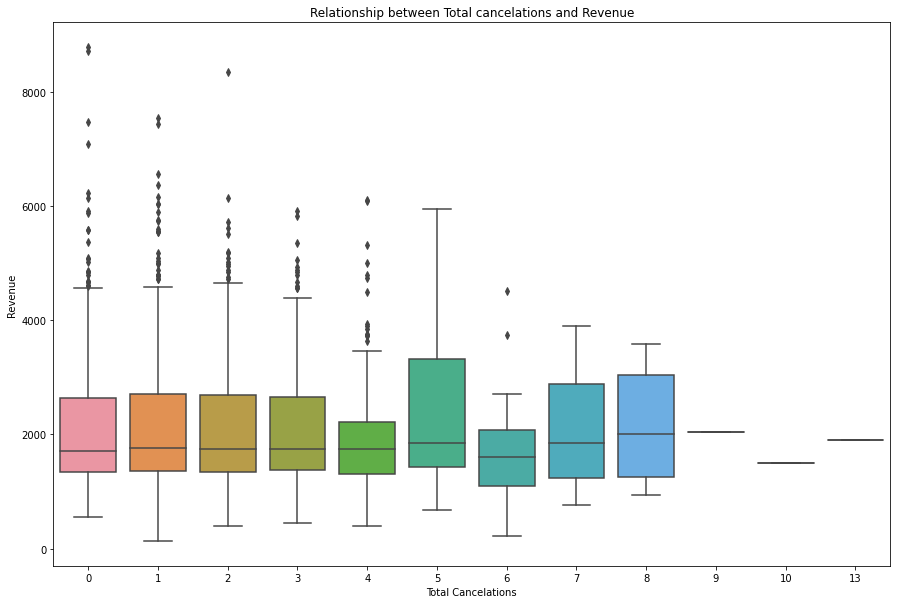


Cancelations

-----------
Total Cancelations
-----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: Total_cancelations, dtype: int64

---------------------
Cancelation Correlations
---------------------
Cancellations_before_noon    0.01
Cancellations_after_noon    -0.04
Total_cancelations           0.00
Revenue                      1.00
Name: Revenue, dtype: float64




In [27]:
# Total Cancelations
chef_new['Total_cancelations'] = chef_new['Cancellations_before_noon'] + \
                                 chef_new['Cancellations_after_noon']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# Developing a boxplot
sns.boxplot(x    = 'Total_cancelations',
            y    = 'Revenue',
            data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Total cancelations and Revenue')
plt.xlabel(xlabel = 'Total Cancelations')
plt.ylabel(ylabel = 'Revenue')

# Displaying & saving the plot
plt.tight_layout
plt.savefig('./analysis_images/Total Cancelations boxplot.png')
plt.show()

# Developing a correlation matrix
canc_corr = chef_new.loc[ : , ['Cancellations_before_noon',
                               'Cancellations_after_noon',
                               'Total_cancelations',
                               'Revenue']  ].corr(method = 'pearson')\
                                            .round(decimals = 2)

# Printing value counts and correlations cancelations
print(f"""
Cancelations
=========

-----------
Total Cancelations
-----------
{chef_new['Total_cancelations'].value_counts(normalize = False).sort_index()}

---------------------
Cancelation Correlations
---------------------
{canc_corr['Revenue']}

""")

In [ ]:
# Adding outliers to highest number
chef_new['Total_cancelations'].replace([9,10,13],8, inplace = True)

In [ ]:
# Checking Total_cancelations
chef_new['Total_cancelations'].value_counts().sort_index()

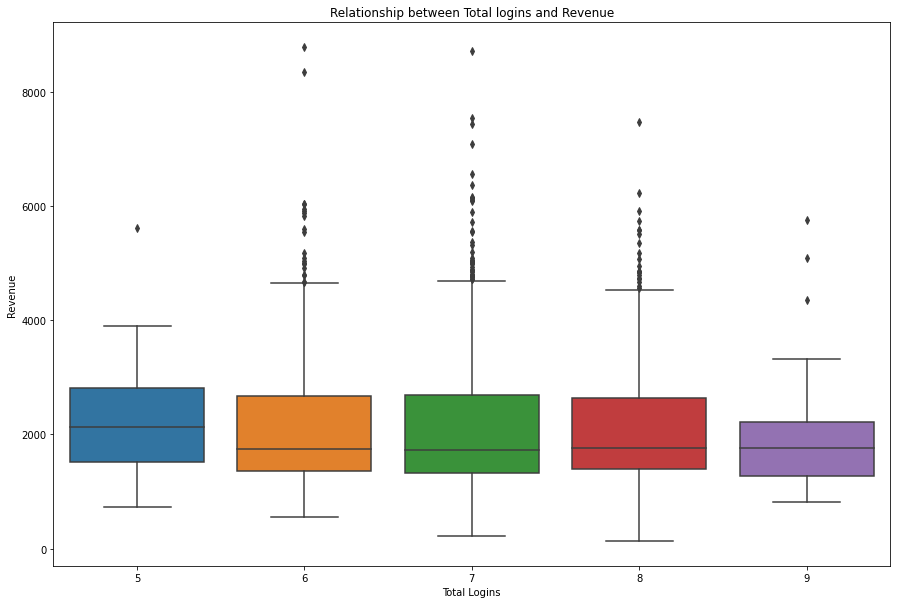


Logins

-----------
Total Logins
-----------
5     31
6    493
7    906
8    492
9     24
Name: Total_logins, dtype: int64

---------------------
Login Correlations
---------------------
Pc_logins        0.02
Mobile_logins   -0.02
Total_logins    -0.00
Revenue          1.00
Name: Revenue, dtype: float64




In [28]:
# Total Logins
chef_new['Total_logins'] = chef_new['Pc_logins'] + chef_new['Mobile_logins']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a boxplot
sns.boxplot(x    = 'Total_logins',
            y    = 'Revenue',
            data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Total logins and Revenue')
plt.xlabel(xlabel = 'Total Logins')
plt.ylabel(ylabel = 'Revenue')

# Displaying and saving the plot
plt.tight_layout
plt.savefig('./analysis_images/Total Logins boxplot.png')
plt.show()

# Developing a correlation matrix
login_corr = chef_new.loc[ : , ['Pc_logins',
                                'Mobile_logins',
                                'Total_logins',
                                'Revenue']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)

# Printing value counts and correlations logins
print(f"""
Logins
=========

-----------
Total Logins
-----------
{chef_new['Total_logins'].value_counts(normalize = False).sort_index()}

---------------------
Login Correlations
---------------------
{login_corr['Revenue']}

""")

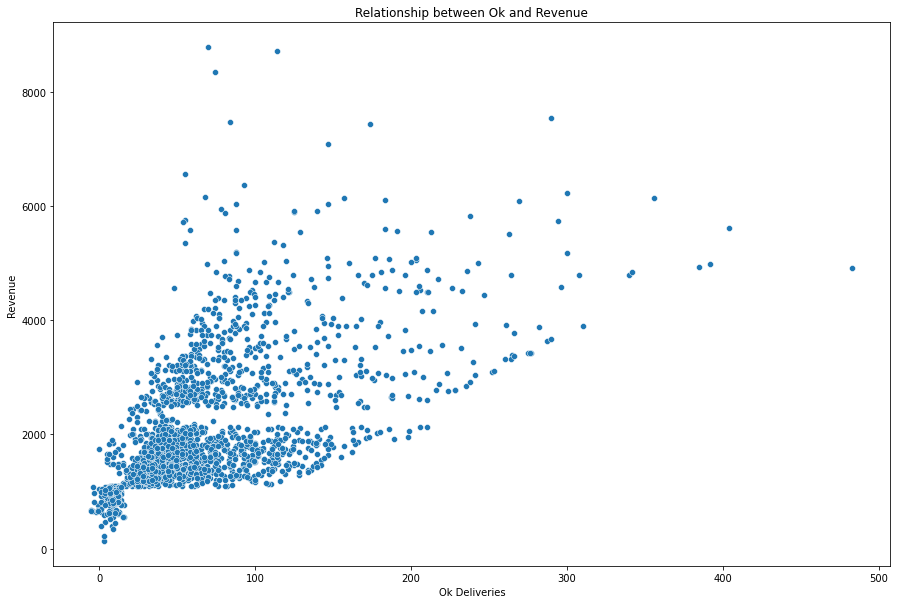


Delivery Correlations

Early_deliveries   -0.00
Late_deliveries    -0.01
Ok_deliveries       0.60
Revenue             1.00
Name: Revenue, dtype: float64



In [29]:
# On-time Deliveries
chef_new['Ok_deliveries'] = chef_new['Total_meals_ordered'] - chef_new['Total_cancelations'] \
                                 - (chef_new['Early_deliveries'] + chef_new['Late_deliveries'])

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a boxplot
sns.scatterplot(x    = 'Ok_deliveries',
                y    = 'Revenue',
                data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Ok and Revenue')
plt.xlabel(xlabel = 'Ok Deliveries')
plt.ylabel(ylabel = 'Revenue')

# Displaying and saving the plot
plt.tight_layout
plt.savefig('./analysis_images/Ok Deliveries scatterplot.png')
plt.show()

# developing a correlation matrix
del_corr = chef_new.loc[ : , ['Early_deliveries',
                              'Late_deliveries',
                              'Ok_deliveries',
                              'Revenue']  ].corr(method = 'pearson')\
                                           .round(decimals = 2)

# printing value counts and correlations deliveries
print(f"""
Delivery Correlations
=====================

{del_corr['Revenue']}
""")

In [ ]:
# Setting figure size
fig, ax = plt.subplots(figsize = (5, 3))

# Creating the plot
ok_plot = sns.scatterplot(x = chef_new['Ok_deliveries'],
                            y = chef_new['Revenue'],
                            color = 'g')

# Setting the x-axis limit
ok_plot.set(xlim = (0,20))

# Displaying and saving the plot
plt.savefig('./analysis_images/Ok Deliveries scatterplot - Zoomed.png')
plt.show()

## Encoding Categorical Data

In [30]:
# STEP 1: Splitting emails

# Placeholder list: Email_group
Email_group = []

# Looping over each email address
for index, col in chef_new.iterrows():
    
    # Splitting email domain at '@'
    split_email = chef_new.loc[index, 'Email'].split(sep = '@')
    
    # Appending placeholder_lst with the results
    Email_group.append(split_email)
    
# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(Email_group)

# Displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [31]:
# STEP 2: Concatenating with original DataFrame

# Renaming column to concatenate
email_df.columns = ['0' , 'Email_domain']

# Concatenating Email_domain with chef_new DataFrame
chef_new = pd.concat([chef_new, email_df['Email_domain']],
                      axis = 1)

# Printing value counts of personal_email_domain
chef_new.loc[ : ,'Email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
nike.com             27
apple.com            27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
verizon.com          22
caterpillar.com      22
pg.com               22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: Email_domain, dtype: int64

In [32]:
# Email domain types
Personal = ['@gmail.com','@yahoo.com','@protonmail.com']
Junk  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# Placeholder list: Email_group
Email_group = []

# Looping to group observations by domain type
for domain in chef_new['Email_domain']:
        if '@' + domain in Personal:
            Email_group.append('Personal')
        elif '@' + domain in Junk:
            Email_group.append('Junk')
        else:
            Email_group.append('Professional')

# Concatenating with original DataFrame
chef_new['Email_group'] = pd.Series(Email_group)

# Counting each category in Email_group column
print(f"""
Email_group
------
{chef_new['Email_group'].value_counts()}
""")


Email_group
------
Personal        861
Professional    696
Junk            389
Name: Email_group, dtype: int64



In [33]:
# Defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    # Plot and save figure
    plt.suptitle("")
    plt.savefig('./analysis_images/Categorical Boxplots.png')
    plt.show()

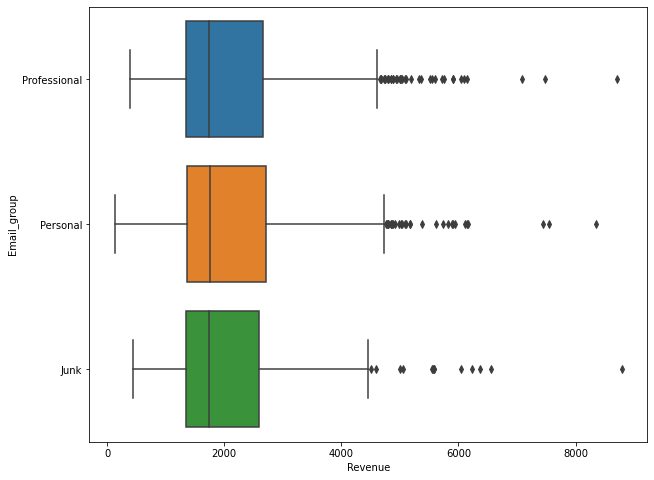

In [34]:
# Calling the function for Email_group
categorical_boxplots(response = 'Revenue',
                     cat_var  = 'Email_group',
                     data     = chef_new)

In [35]:
# One hot encoding categorical variables
one_hot_Email_group = pd.get_dummies(chef_new['Email_group'])

# Dropping categorical variables after they've been encoded
chef_new = chef_new.drop('Email_group', axis = 1)

# Joining codings together
chef_new = chef_new.join([one_hot_Email_group])

# Saving new columns
new_columns = chef_new.columns

### Name Feature

In [36]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='House_names'):

    df[new_col_name] = 0
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [37]:
# calling text_split_feature
text_split_feature(col = 'Name',
                   df  = chef_new)


# checking results
chef_new['House_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: House_names, dtype: int64

### Gender Feature

In [38]:
Gender_guess = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'female', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'mostly_male', 'male', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'male', 'female', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'mostly_female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'andy', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown']

chef_new['Gender_guess'] = Gender_guess

In [39]:
chef_new['Gender_guess'].replace('mostly_female','female', inplace=True)
chef_new['Gender_guess'].replace('mostly_male','male', inplace=True)
chef_new['Gender_guess'].replace('andy','male', inplace=True)

In [40]:
# One hot encoding categorical variables
one_hot_Gender = pd.get_dummies(chef_new['Gender_guess'])

# Dropping categorical variables after they've been encoded
chef_new = chef_new.drop('Gender_guess', axis = 1)

# Joining codings together
chef_new = chef_new.join([one_hot_Gender])

# Saving new columns
new_columns = chef_new.columns

## Creating final DF

In [41]:
# Dropping Professional dummie and all other remaining categorical columns 
chef_fin = chef_new.drop(['Professional','Email_domain', 'Email', 'Name', 'First_name', 'unknown'], 
                          axis = 1)

In [42]:
# Creating a (Pearson) correlation matrix
chef_fin_corr = chef_fin.corr().round(2)

# Printing (Pearson) correlations with Revenue and log_Revenue
print(f"""
Revenue Corr      
------------      
{chef_fin_corr.loc['Revenue'].sort_values(ascending = False)}  

log_Revenue Corr
----------------
{chef_fin_corr.loc['log_Revenue'].sort_values(ascending = False)}
""")


Revenue Corr      
------------      
Revenue                               1.00
log_Revenue                           0.95
Avg_prep_vid_time                     0.64
log_Avg_prep_vid_time                 0.63
log_Total_meals_ordered               0.61
Median_meal_rating                    0.61
Total_meals_ordered                   0.60
Ok_deliveries                         0.60
log_Median_meal_rating                0.55
Total_photos_viewed                   0.47
Master_classes_attended               0.45
Avg_meals_pc                          0.44
log_Avg_meals_pc                      0.42
log_Total_photos_viewed               0.41
out_Total_meals_ordered               0.38
has_Viewed_photos                     0.37
Ordered_regularly                     0.36
out_Total_photos_viewed               0.33
out_Avg_prep_vid_time                 0.32
log_Contacts_w_customer_service       0.17
log_Avg_time_per_site_visit           0.15
Avg_time_per_site_visit               0.14
Contacts_w_cust

In [43]:
# Making a copy of chef_fin
chef_explanatory = chef_fin.copy()

# Dropping Revenue and log_Revenue from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['Revenue',
                                          'log_Revenue'], axis = 1)

# For-loo- for formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(val, '+')

Cross_sell_success +
Total_meals_ordered +
Unique_meals_purch +
Contacts_w_customer_service +
Product_categories_viewed +
Avg_time_per_site_visit +
Mobile_number +
Cancellations_before_noon +
Cancellations_after_noon +
Tastes_and_preferences +
Pc_logins +
Mobile_logins +
Weekly_plan +
Early_deliveries +
Late_deliveries +
Package_locker +
Refrigerated_locker +
Avg_prep_vid_time +
Avg_meals_pc +
Master_classes_attended +
Median_meal_rating +
Avg_clicks_per_visit +
Total_photos_viewed +
Ordered_regularly +
Regular_contact_w_customer_service +
has_Viewed_photos +
On_time_delivery +
has_Logins +
has_Unique_meals_purch +
Total_clicks_per_visit +
out_Total_meals_ordered +
out_Avg_time_per_site_visit +
out_Early_deliveries +
out_Late_deliveries +
out_Avg_prep_vid_time +
out_Avg_meals_pc +
out_Total_photos_viewed +
log_Total_meals_ordered +
log_Unique_meals_purch +
log_Contacts_w_customer_service +
log_Avg_time_per_site_visit +
log_Early_deliveries +
log_Late_deliveries +
log_Avg_prep_vid_time 

In [ ]:
# Saving feature-rich dataset in Excel
chef_fin.to_excel('./datasets/Apprentice_Chef_Feature_Rich.xlsx',
                 index = False)

# Building Predictive Models

## OLS models before train-test-split

In [44]:
# Building a full model

# Blueprinting a model type
lm_full = smf.ols(formula = """ Revenue ~ Cross_sell_success +
                                            Total_meals_ordered +
                                            Unique_meals_purch +
                                            Contacts_w_customer_service +
                                            Product_categories_viewed +
                                            Avg_time_per_site_visit +
                                            Mobile_number +
                                            Cancellations_before_noon +
                                            Cancellations_after_noon +
                                            Tastes_and_preferences +
                                            Pc_logins +
                                            Mobile_logins +
                                            Weekly_plan +
                                            Early_deliveries +
                                            Late_deliveries +
                                            Package_locker +
                                            Refrigerated_locker +
                                            Avg_prep_vid_time +
                                            Avg_meals_pc +
                                            Master_classes_attended +
                                            Median_meal_rating +
                                            Avg_clicks_per_visit +
                                            Total_photos_viewed +
                                            Ordered_regularly +
                                            Regular_contact_w_customer_service +
                                            has_Viewed_photos +
                                            On_time_delivery +
                                            has_Logins +
                                            has_Unique_meals_purch +
                                            Total_clicks_per_visit +
                                            out_Total_meals_ordered +
                                            out_Avg_time_per_site_visit +
                                            out_Early_deliveries +
                                            out_Late_deliveries +
                                            out_Avg_prep_vid_time +
                                            out_Avg_meals_pc +
                                            out_Total_photos_viewed +
                                            Total_cancelations +
                                            Total_logins +
                                            Ok_deliveries +
                                            Junk +
                                            Personal +
                                            House_names +
                                            female +
                                            male +
                                            log_Total_meals_ordered +
                                            log_Unique_meals_purch +
                                            log_Contacts_w_customer_service +
                                            log_Avg_time_per_site_visit +
                                            log_Early_deliveries +
                                            log_Late_deliveries +
                                            log_Avg_prep_vid_time +
                                            log_Avg_meals_pc +
                                            log_Avg_clicks_per_visit +
                                            log_Total_photos_viewed +
                                            log_Total_clicks_per_visit +
                                            log_Product_categories_viewed +
                                            log_Pc_logins +
                                            log_Median_meal_rating""",
                                          data = chef_fin)

# Telling Python to run the data through the blueprint
results_full = lm_full.fit()

# Printing the results
print(results_full.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     96.37
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                -15155.
No. Observations:                1946   AIC:                         3.042e+04
Df Residuals:                    1890   BIC:                         3.073e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [45]:
# Building a fit model
## Model Example 1 (Revenue) ##

# Building a fit model
lm_fit = smf.ols(formula = """ Revenue ~ Cross_sell_success +
                                            Contacts_w_customer_service +
                                            Avg_prep_vid_time +
                                            Avg_meals_pc +
                                            Master_classes_attended +
                                            Median_meal_rating +
                                            Ordered_regularly +
                                            Regular_contact_w_customer_service +
                                            has_Viewed_photos +
                                            out_Total_meals_ordered +
                                            male +
                                            log_Total_meals_ordered +
                                            log_Unique_meals_purch +
                                            log_Total_photos_viewed""",
                                          data = chef_fin)

# Telling Python to run the data through the blueprint
results_fit = lm_fit.fit()

# Printing the results
print(results_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     297.7
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                -15336.
No. Observations:                1946   AIC:                         3.070e+04
Df Residuals:                    1931   BIC:                         3.079e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [46]:
# Building a full model

# Blueprinting a model type
lm_full_log = smf.ols(formula = """ log_Revenue ~ Cross_sell_success +
                                            Total_meals_ordered +
                                            Unique_meals_purch +
                                            Contacts_w_customer_service +
                                            Product_categories_viewed +
                                            Avg_time_per_site_visit +
                                            Mobile_number +
                                            Cancellations_before_noon +
                                            Cancellations_after_noon +
                                            Tastes_and_preferences +
                                            Pc_logins +
                                            Mobile_logins +
                                            Weekly_plan +
                                            Early_deliveries +
                                            Late_deliveries +
                                            Package_locker +
                                            Refrigerated_locker +
                                            Avg_prep_vid_time +
                                            Avg_meals_pc +
                                            Master_classes_attended +
                                            Median_meal_rating +
                                            Avg_clicks_per_visit +
                                            Total_photos_viewed +
                                            Ordered_regularly +
                                            Regular_contact_w_customer_service +
                                            has_Viewed_photos +
                                            On_time_delivery +
                                            has_Logins +
                                            has_Unique_meals_purch +
                                            Total_clicks_per_visit +
                                            out_Total_meals_ordered +
                                            out_Avg_time_per_site_visit +
                                            out_Early_deliveries +
                                            out_Late_deliveries +
                                            out_Avg_prep_vid_time +
                                            out_Avg_meals_pc +
                                            out_Total_photos_viewed +
                                            Total_cancelations +
                                            Total_logins +
                                            Ok_deliveries +
                                            Junk +
                                            Personal +
                                            House_names +
                                            female +
                                            male +
                                            log_Total_meals_ordered +
                                            log_Unique_meals_purch +
                                            log_Contacts_w_customer_service +
                                            log_Avg_time_per_site_visit +
                                            log_Early_deliveries +
                                            log_Late_deliveries +
                                            log_Avg_prep_vid_time +
                                            log_Avg_meals_pc +
                                            log_Avg_clicks_per_visit +
                                            log_Total_photos_viewed +
                                            log_Total_clicks_per_visit +
                                            log_Product_categories_viewed +
                                            log_Pc_logins +
                                            log_Median_meal_rating""",
                                                  data = chef_fin)

# Telling Python to run the data through the blueprint
results_full_log = lm_full_log.fit()

# Printing the results
print(results_full_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                 1812.1
No. Observations:                1946   AIC:                            -3512.
Df Residuals:                    1890   BIC:                            -3200.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [47]:
# Building a fit model
## Model Example 2 (log_Revenue) ##

# Blueprinting a model type
lm_fit_log = smf.ols(formula = """ log_Revenue ~ Cross_sell_success +
                                            Contacts_w_customer_service +
                                            Avg_prep_vid_time +
                                            Avg_meals_pc +
                                            Master_classes_attended +
                                            Median_meal_rating +
                                            Regular_contact_w_customer_service +
                                            has_Viewed_photos +
                                            On_time_delivery +
                                            has_Logins +
                                            has_Unique_meals_purch +
                                            male +
                                            log_Total_meals_ordered +
                                            log_Unique_meals_purch +
                                            log_Avg_prep_vid_time +
                                            log_Total_photos_viewed""",
                                                  data = chef_fin)

# Telling Python to run the data through the blueprint
results_fit_log = lm_fit_log.fit()

# Printing the results
print(results_fit_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     394.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                 1623.8
No. Observations:                1946   AIC:                            -3216.
Df Residuals:                    1930   BIC:                            -3126.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Train-test-split full DF

In [48]:
# Preparing explanatory variable data
chef_data   = chef_fin.drop(['Revenue',
                             'log_Revenue'],
                             axis = 1)

# Preparing response variables
chef_target = chef_fin.loc[ : , 'Revenue']

# Preparing training and testing sets chef_target
X_train, X_test, y_train, y_test = train_test_split(chef_data,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 219)

# Checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}

Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 59)
y-side: (1459,)

Testing Data
------------
X-side: (487, 59)
y-side: (487,)



In [49]:
# Preparing explanatory variable data
chef_data_log   = chef_fin.drop(['Revenue',
                             'log_Revenue'],
                             axis = 1)

# Preparing response variables
chef_target_log = chef_fin.loc[ : , 'log_Revenue']

# Preparing training and testing sets chef_target
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(chef_data_log,
                                                                    chef_target_log,
                                                                    test_size = 0.25,
                                                                    random_state = 219)

# Checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train_log.shape}
y-side: {y_train_log.shape}

Testing Data
------------
X-side: {X_test_log.shape}
y-side: {y_test_log.shape}
""") 


Training Data
-------------
X-side: (1459, 59)
y-side: (1459,)

Testing Data
------------
X-side: (487, 59)
y-side: (487,)



## Ordinary Least Squares Regression

In [50]:
# Declaring set of x-variables
x_variables = ['Cross_sell_success','Contacts_w_customer_service',
               'Avg_prep_vid_time','Avg_meals_pc','Master_classes_attended',
               'Median_meal_rating','Ordered_regularly',
               'Regular_contact_w_customer_service','has_Viewed_photos',
               'out_Total_meals_ordered','male','log_Total_meals_ordered',
               'log_Unique_meals_purch','log_Total_photos_viewed']
                                            
# Looping to make x-variables suitable for statsmodels
print("""
X-variables Revenue
-------------------""")
for val in x_variables:
    print(f"{val} +")


X-variables Revenue
-------------------
Cross_sell_success +
Contacts_w_customer_service +
Avg_prep_vid_time +
Avg_meals_pc +
Master_classes_attended +
Median_meal_rating +
Ordered_regularly +
Regular_contact_w_customer_service +
has_Viewed_photos +
out_Total_meals_ordered +
male +
log_Total_meals_ordered +
log_Unique_meals_purch +
log_Total_photos_viewed +


In [51]:
# Declaring set of x_log-variables
x_variables_log = ['Cross_sell_success','Contacts_w_customer_service',
                   'Avg_prep_vid_time','Avg_meals_pc','Master_classes_attended',
                   'Median_meal_rating','Regular_contact_w_customer_service',
                   'has_Viewed_photos','On_time_delivery','has_Logins',
                   'has_Unique_meals_purch','male','log_Total_meals_ordered',
                   'log_Unique_meals_purch','log_Avg_prep_vid_time',
                   'log_Total_photos_viewed']

# Looping to make x-variables suitable for statsmodels
print("""
X-variables log_Revenue
-----------------------""")
for val in x_variables_log:
    print(f"{val} +")


X-variables log_Revenue
-----------------------
Cross_sell_success +
Contacts_w_customer_service +
Avg_prep_vid_time +
Avg_meals_pc +
Master_classes_attended +
Median_meal_rating +
Regular_contact_w_customer_service +
has_Viewed_photos +
On_time_delivery +
has_Logins +
has_Unique_meals_purch +
male +
log_Total_meals_ordered +
log_Unique_meals_purch +
log_Avg_prep_vid_time +
log_Total_photos_viewed +


In [52]:
# Merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
ols_norm = smf.ols(formula =  """Revenue ~ Cross_sell_success +
                                            Contacts_w_customer_service +
                                            Avg_prep_vid_time +
                                            Avg_meals_pc +
                                            Master_classes_attended +
                                            Median_meal_rating +
                                            Ordered_regularly +
                                            Regular_contact_w_customer_service +
                                            has_Viewed_photos +
                                            out_Total_meals_ordered +
                                            male +
                                            log_Total_meals_ordered +
                                            log_Unique_meals_purch +
                                            log_Total_photos_viewed""",
                                data = chef_train)

# Step 2: fit the model based on the data
results_ols = ols_norm.fit()

# Step 3: analyze the summary output
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                -11497.
No. Observations:                1459   AIC:                         2.302e+04
Df Residuals:                    1444   BIC:                         2.310e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [53]:
# Merging X_train and y_train so that they can be used in statsmodels
chef_train_log = pd.concat([X_train_log, y_train_log], axis = 1)

# Step 1: build a model
ols_log = smf.ols(formula =  """ log_Revenue ~ Cross_sell_success +
                                                Contacts_w_customer_service +
                                                Avg_meals_pc +
                                                Master_classes_attended +
                                                Median_meal_rating +
                                                Regular_contact_w_customer_service +
                                                has_Viewed_photos +
                                                On_time_delivery +
                                                has_Logins +
                                                has_Unique_meals_purch +
                                                male +
                                                log_Total_meals_ordered +
                                                log_Unique_meals_purch +
                                                log_Avg_prep_vid_time +
                                                log_Total_photos_viewed""",
                                data = chef_train_log)

# Step 2: fit the model based on the data
results_ols_log = ols_log.fit()

# Step 3: analyze the summary output
print(results_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     312.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:54:09   Log-Likelihood:                 1229.0
No. Observations:                1459   AIC:                            -2428.
Df Residuals:                    1444   BIC:                            -2349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [54]:
# Preparing x-variables from the OLS model
ols_data = chef_fin[x_variables]

# Preparing response variable
chef_target = chef_fin['Revenue']

# OLS X-dataset (normal Y)
X_train_Onorm, X_test_Onorm, y_train_Onorm, y_test_Onorm = train_test_split(
                                                            ols_data,
                                                            chef_target,
                                                            test_size = 0.25,
                                                            random_state = 219)

In [55]:
# Preparing x-variables from the OLS model
ols_data_log = chef_fin[x_variables_log]

# Preparing response variable
chef_target_log = chef_fin['log_Revenue']

# OLS log_X-dataset (normal Y)
X_train_Olog, X_test_Olog, y_train_Olog, y_test_Olog = train_test_split(
                                                            ols_data_log,
                                                            chef_target_log,
                                                            test_size = 0.25,
                                                            random_state = 219)

In [56]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit     = lr.fit(X_train_Onorm, y_train_Onorm)

# PREDICTING on new data
lr_pred     = lr_fit.predict(X_test_Onorm)

# SCORING the results
print('OLS Training Score :', lr.score(X_train_Onorm, y_train_Onorm).round(4)) # using R-square
print('OLS Testing Score  :', lr.score(X_test_Onorm, y_test_Onorm).round(4)) # using R-square

# Saving scoring data for future use
lr_train_score     = lr.score(X_train_Onorm, y_train_Onorm).round(4)
lr_test_score      = lr.score(X_test_Onorm, y_test_Onorm).round(4)

# Displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.675
OLS Testing Score  : 0.701
OLS Train-Test Gap : 0.026


In [57]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit_log = lr.fit(X_train_Olog, y_train_Olog)

# PREDICTING on new data
lr_pred_log = lr_fit_log.predict(X_test_Olog)

# SCORING the results
print('OLS Training Log Score :', lr.score(X_train_Olog, y_train_Olog).round(4)) # using R-square
print('OLS Testing Log Score  :', lr.score(X_test_Olog, y_test_Olog).round(4)) # using R-square

# Saving scoring data for future use
lr_train_log_score = lr.score(X_train_Olog, y_train_Olog).round(4)
lr_test_log_score  = lr.score(X_test_Olog, y_test_Olog).round(4)

# Displaying and saving the gap between training and testing
print('OLS Train-Test Log Gap :', abs(lr_train_log_score - lr_test_log_score).round(4))
lr_test_log_gap = abs(lr_train_log_score - lr_test_log_score).round(4)

OLS Training Log Score : 0.7525
OLS Testing Log Score  : 0.754
OLS Train-Test Log Gap : 0.0015


In [58]:
# Zipping each feature name to its coefficient
lr_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
lr_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in lr_values:
    lr_lst.append(val)
    
# Checking the results
for pair in lr_lst:
    print(pair)

('intercept', 145.06)
('Cross_sell_success', -87.6)
('Contacts_w_customer_service', 126.44)
('Avg_prep_vid_time', 7.87)
('Avg_meals_pc', -67.25)
('Master_classes_attended', 147.63)
('Median_meal_rating', 294.7)
('Ordered_regularly', -996.54)
('Regular_contact_w_customer_service', -1698.53)
('has_Viewed_photos', -1116.23)
('out_Total_meals_ordered', 531.14)
('male', 74.59)
('log_Total_meals_ordered', 707.04)
('log_Unique_meals_purch', -915.55)
('log_Total_photos_viewed', 386.77)


In [59]:
# Zipping each feature name to its coefficient
lr_values_log = zip(chef_data[x_variables_log].columns,
                      lr_fit_log.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
lr_lst_log = [('intercept', lr_fit_log.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in lr_values_log:
    lr_lst_log.append(val)
    
# Checking the results
for pair in lr_lst_log:
    print(pair)

('intercept', 1.97)
('Cross_sell_success', -0.02)
('Contacts_w_customer_service', 0.02)
('Avg_prep_vid_time', 0.0)
('Avg_meals_pc', -0.01)
('Master_classes_attended', 0.03)
('Median_meal_rating', 0.06)
('Regular_contact_w_customer_service', -0.22)
('has_Viewed_photos', -0.11)
('On_time_delivery', 0.06)
('has_Logins', 0.06)
('has_Unique_meals_purch', -0.13)
('male', 0.01)
('log_Total_meals_ordered', 0.16)
('log_Unique_meals_purch', -0.16)
('log_Avg_prep_vid_time', 0.38)
('log_Total_photos_viewed', 0.04)


## Lasso Regression

In [60]:
# INSTANTIATING a model object
lasso = Lasso(alpha = 0.5, normalize = False) 

# FITTING to the training data
lasso_fit = lasso.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# SCORING the results
print('Lasso Training Score :', lasso.score(X_train, y_train).round(4))
print('Lasso Testing Score  :', lasso.score(X_test, y_test).round(4))

# Saving scoring data for future use
lasso_train_score = lasso.score(X_train, y_train).round(4)
lasso_test_score  = lasso.score(X_test, y_test).round(4)

# Displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7281
Lasso Testing Score  : 0.7326
Lasso Train-Test Gap : 0.0045


/Users/jasmijnvanhulsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118409302.25104249, tolerance: 183693.46853554444
  model = cd_fast.enet_coordinate_descent(


In [61]:
# Zipping each feature name to its coefficient
lasso_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
lasso_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in lasso_values:
    lasso_lst.append(val)
    
# Checking the results
for pair in lasso_lst:
    print(pair)

('intercept', -404.19)
('Cross_sell_success', -109.75)
('Total_meals_ordered', 11.72)
('Unique_meals_purch', 250.98)
('Contacts_w_customer_service', 198.33)
('Product_categories_viewed', 52.37)
('Avg_time_per_site_visit', -0.05)
('Mobile_number', 0.0)
('Cancellations_before_noon', 0.0)
('Cancellations_after_noon', -2.3)
('Tastes_and_preferences', 38.52)
('Pc_logins', 22.51)
('Mobile_logins', -0.0)
('Weekly_plan', 0.31)
('Early_deliveries', -14.59)
('Late_deliveries', 6.61)
('Package_locker', -22.7)
('Refrigerated_locker', -18.54)
('Avg_prep_vid_time', 7.47)
('Avg_meals_pc', -62.3)
('Master_classes_attended', 151.93)
('Median_meal_rating', 783.16)
('Avg_clicks_per_visit', 7.73)
('Total_photos_viewed', 0.42)
('Ordered_regularly', -271.14)
('Regular_contact_w_customer_service', -1062.66)
('has_Viewed_photos', -498.54)
('On_time_delivery', -108.7)
('has_Logins', -0.0)
('has_Unique_meals_purch', -17.6)
('Total_clicks_per_visit', -2.54)
('out_Total_meals_ordered', 157.22)
('out_Avg_time_per_

In [62]:
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_lst:
        
        if coefficient == 0:
            lasso_lst.remove((feature, coefficient))
            
# Checking the results
for pair in lasso_lst:
    print(pair)

('intercept', -404.19)
('Cross_sell_success', -109.75)
('Total_meals_ordered', 11.72)
('Unique_meals_purch', 250.98)
('Contacts_w_customer_service', 198.33)
('Product_categories_viewed', 52.37)
('Avg_time_per_site_visit', -0.05)
('Cancellations_before_noon', 0.0)
('Cancellations_after_noon', -2.3)
('Tastes_and_preferences', 38.52)
('Pc_logins', 22.51)
('Weekly_plan', 0.31)
('Early_deliveries', -14.59)
('Late_deliveries', 6.61)
('Package_locker', -22.7)
('Refrigerated_locker', -18.54)
('Avg_prep_vid_time', 7.47)
('Avg_meals_pc', -62.3)
('Master_classes_attended', 151.93)
('Median_meal_rating', 783.16)
('Avg_clicks_per_visit', 7.73)
('Total_photos_viewed', 0.42)
('Ordered_regularly', -271.14)
('Regular_contact_w_customer_service', -1062.66)
('has_Viewed_photos', -498.54)
('On_time_delivery', -108.7)
('has_Unique_meals_purch', -17.6)
('Total_clicks_per_visit', -2.54)
('out_Total_meals_ordered', 157.22)
('out_Avg_time_per_site_visit', -48.23)
('out_Early_deliveries', -65.73)
('out_Late_del

## Bayesian Automatic Relevance Determination (ARD)

In [63]:
# INSTANTIATING a model object
ard = ARDRegression(normalize = False)

# FITTING the training data
ard_fit = ard.fit(X_train, y_train)

# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)

print('ARD Training Score :', ard.score(X_train, y_train).round(4))
print('ARD Testing Score  :', ard.score(X_test, y_test).round(4))

# Saving scoring data for future use
ard_train_score = ard.score(X_train, y_train).round(4)
ard_test_score  = ard.score(X_test, y_test).round(4)

# Displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.7251
ARD Testing Score  : 0.7403
ARD Train-Test Gap : 0.0152


In [64]:
# INSTANTIATING a model object
ard_log = ARDRegression(normalize = False)

# FITTING the training data
ard_fit_log = ard_log.fit(X_train_log, y_train_log)

# PREDICTING on new data
ard_pred_log = ard_fit_log.predict(X_test_log)

print('ARD Training Log Score :', ard_log.score(X_train_log, y_train_log).round(4))
print('ARD Testing Log Score  :', ard_log.score(X_test_log, y_test_log).round(4))

# Saving scoring data for future use
ard_train_score_log = ard_log.score(X_train_log, y_train_log).round(4)
ard_test_score_log  = ard_log.score(X_test_log, y_test_log).round(4)

# Displaying and saving the gap between training and testing
print('ARD Train-Test Log Gap :', abs(ard_train_score_log - ard_test_score_log).round(4))
ard_test_gap_log = abs(ard_train_score_log - ard_test_score_log).round(4)

ARD Training Log Score : 0.7903
ARD Testing Log Score  : 0.7878
ARD Train-Test Log Gap : 0.0025


In [65]:
# Zipping each feature name to its coefficient
ard_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
ard_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in ard_values:
    ard_lst.append(val)
    
# Checking the results
for pair in ard_lst:
    print(pair)

('intercept', 375.32)
('Cross_sell_success', -79.1)
('Total_meals_ordered', 0.0)
('Unique_meals_purch', 260.86)
('Contacts_w_customer_service', 265.65)
('Product_categories_viewed', 4.4)
('Avg_time_per_site_visit', 0.0)
('Mobile_number', 0.0)
('Cancellations_before_noon', 0.0)
('Cancellations_after_noon', 0.0)
('Tastes_and_preferences', 14.49)
('Pc_logins', -0.0)
('Mobile_logins', -0.0)
('Weekly_plan', 0.0)
('Early_deliveries', -0.0)
('Late_deliveries', 0.0)
('Package_locker', -0.0)
('Refrigerated_locker', -0.07)
('Avg_prep_vid_time', 7.41)
('Avg_meals_pc', -58.83)
('Master_classes_attended', 150.71)
('Median_meal_rating', 896.91)
('Avg_clicks_per_visit', -0.0)
('Total_photos_viewed', 0.64)
('Ordered_regularly', -968.1)
('Regular_contact_w_customer_service', -1817.25)
('has_Viewed_photos', -0.0)
('On_time_delivery', -33.75)
('has_Logins', -33.75)
('has_Unique_meals_purch', -0.0)
('Total_clicks_per_visit', -0.0)
('out_Total_meals_ordered', 195.37)
('out_Avg_time_per_site_visit', -0.0)
(

In [66]:
# Zipping each feature name to its coefficient
ard_values_log = zip(chef_data_log.columns, ard_fit_log.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
ard_lst_log = [('intercept', ard_fit_log.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in ard_values_log:
    ard_lst_log.append(val)

# Checking the results
for pair in ard_lst_log:
    print(pair)

('intercept', 1.99)
('Cross_sell_success', -0.01)
('Total_meals_ordered', 0.0)
('Unique_meals_purch', 0.05)
('Contacts_w_customer_service', 0.04)
('Product_categories_viewed', 0.0)
('Avg_time_per_site_visit', 0.0)
('Mobile_number', 0.0)
('Cancellations_before_noon', 0.0)
('Cancellations_after_noon', 0.0)
('Tastes_and_preferences', 0.0)
('Pc_logins', 0.0)
('Mobile_logins', 0.0)
('Weekly_plan', 0.0)
('Early_deliveries', 0.0)
('Late_deliveries', 0.0)
('Package_locker', 0.0)
('Refrigerated_locker', 0.0)
('Avg_prep_vid_time', 0.0)
('Avg_meals_pc', -0.01)
('Master_classes_attended', 0.03)
('Median_meal_rating', 0.12)
('Avg_clicks_per_visit', 0.0)
('Total_photos_viewed', 0.0)
('Ordered_regularly', -0.1)
('Regular_contact_w_customer_service', -0.34)
('has_Viewed_photos', -0.07)
('On_time_delivery', 0.0)
('has_Logins', 0.0)
('has_Unique_meals_purch', 0.0)
('Total_clicks_per_visit', 0.0)
('out_Total_meals_ordered', 0.01)
('out_Avg_time_per_site_visit', 0.0)
('out_Early_deliveries', -0.01)
('out_

In [67]:
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in ard_lst:
        
        if coefficient == 0:
            ard_lst.remove((feature, coefficient))
            
# Checking the results
for pair in ard_lst:
    print(pair)

('intercept', 375.32)
('Cross_sell_success', -79.1)
('Unique_meals_purch', 260.86)
('Contacts_w_customer_service', 265.65)
('Product_categories_viewed', 4.4)
('Mobile_number', 0.0)
('Cancellations_after_noon', 0.0)
('Tastes_and_preferences', 14.49)
('Mobile_logins', -0.0)
('Early_deliveries', -0.0)
('Package_locker', -0.0)
('Refrigerated_locker', -0.07)
('Avg_prep_vid_time', 7.41)
('Avg_meals_pc', -58.83)
('Master_classes_attended', 150.71)
('Median_meal_rating', 896.91)
('Total_photos_viewed', 0.64)
('Ordered_regularly', -968.1)
('Regular_contact_w_customer_service', -1817.25)
('On_time_delivery', -33.75)
('has_Logins', -33.75)
('Total_clicks_per_visit', -0.0)
('out_Total_meals_ordered', 195.37)
('out_Early_deliveries', -92.91)
('out_Avg_prep_vid_time', 0.0)
('out_Avg_meals_pc', -263.57)
('log_Total_meals_ordered', 869.63)
('log_Unique_meals_purch', -3206.25)
('log_Contacts_w_customer_service', -2063.25)
('log_Early_deliveries', -0.0)
('log_Avg_prep_vid_time', -0.0)
('log_Avg_clicks_p

In [68]:
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in ard_lst_log:
        
        if coefficient == 0:
            ard_lst_log.remove((feature, coefficient))
            
# Checking the results
for pair in ard_lst_log:
    print(pair)

('intercept', 1.99)
('Cross_sell_success', -0.01)
('Unique_meals_purch', 0.05)
('Contacts_w_customer_service', 0.04)
('Avg_time_per_site_visit', 0.0)
('Cancellations_before_noon', 0.0)
('Tastes_and_preferences', 0.0)
('Mobile_logins', 0.0)
('Early_deliveries', 0.0)
('Package_locker', 0.0)
('Avg_prep_vid_time', 0.0)
('Avg_meals_pc', -0.01)
('Master_classes_attended', 0.03)
('Median_meal_rating', 0.12)
('Total_photos_viewed', 0.0)
('Ordered_regularly', -0.1)
('Regular_contact_w_customer_service', -0.34)
('has_Viewed_photos', -0.07)
('has_Logins', 0.0)
('Total_clicks_per_visit', 0.0)
('out_Total_meals_ordered', 0.01)
('out_Early_deliveries', -0.01)
('out_Avg_prep_vid_time', 0.0)
('out_Avg_meals_pc', -0.01)
('log_Total_meals_ordered', 0.16)
('log_Unique_meals_purch', -0.59)
('log_Contacts_w_customer_service', -0.21)
('log_Avg_time_per_site_visit', 0.01)
('log_Late_deliveries', 0.0)
('log_Avg_prep_vid_time', 0.5)
('log_Avg_clicks_per_visit', 0.0)
('log_Total_photos_viewed', 0.03)
('log_Tota

## KNN

In [69]:
# Preparing explanatory variable data
knn_data   = chef_fin.drop(['Revenue',
                            'log_Revenue',
                            'log_Total_meals_ordered',
                            'log_Unique_meals_purch',
                            'log_Contacts_w_customer_service',
                            'log_Avg_time_per_site_visit',
                            'log_Early_deliveries',
                            'log_Late_deliveries',
                            'log_Avg_prep_vid_time',
                            'log_Avg_meals_pc',
                            'log_Avg_clicks_per_visit',
                            'log_Total_photos_viewed',
                            'log_Total_clicks_per_visit',
                            'log_Product_categories_viewed',
                            'log_Pc_logins',
                            'log_Median_meal_rating'],
                                axis = 1)

# Preparing the target variable
knn_target = chef_fin.loc[ : , 'Revenue']

# KNN X-dataset (normal Y)
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(
                                                            knn_data,
                                                            knn_target,
                                                            test_size = 0.25,
                                                            random_state = 219)

In [70]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(knn_data)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(knn_data)

# Converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# Checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.0,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-2.84,-0.35,-0.84,-0.33,-0.33,-0.31,-3.06,-0.24,-0.22,-0.21,-0.23,-0.17,-0.13,-0.26,-0.98,-2.53,-1.33,-0.5,-0.89,-1.07,-0.28,-0.52
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,0.35,-0.35,-0.84,-0.33,-0.33,-0.31,-0.74,-0.24,-0.22,-0.21,-0.23,-0.17,-0.13,-0.26,-0.98,-1.26,-0.64,-0.5,-0.89,-1.07,-0.28,-0.52
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.35,-0.35,-0.84,-0.33,-0.33,-0.31,0.08,-0.24,-0.22,-0.21,-0.23,-0.17,-0.13,-0.26,-0.35,0.01,-0.26,-0.5,-0.89,0.21,-0.28,-0.52
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.35,-0.35,1.19,-0.33,-0.33,-0.31,0.54,-0.24,-0.22,-0.21,-0.23,-0.17,-0.13,-0.26,0.27,1.28,0.37,-0.5,1.12,0.21,-0.28,-0.52
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,0.35,2.83,1.19,3.01,3.01,3.19,3.94,4.15,4.62,4.86,4.39,5.76,7.61,3.90,7.10,2.55,7.47,2.0,1.12,5.35,3.51,1.92


In [71]:
# Adding labels to the scaled DataFrame
X_scaled_df.columns = knn_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(knn_data)}

Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
Cross_sell_success                        0.218020
Total_meals_ordered                    3057.599946
Unique_meals_purch                        6.257663
Contacts_w_customer_service               5.201168
Product_categories_viewed                 9.261178
Avg_time_per_site_visit                3884.497383
Mobile_number                             0.107344
Cancellations_before_noon                 2.400263
Cancellations_after_noon                  0.186736
Tastes_and_preferences                    0.204082
Pc_logins                                 0.337105
Mobile_logins                             0.278218
Weekly_plan                             184.139876
Early_deliveries                          5.373137
Late_deliveries                           7.528947
Package_locker                            0.229000
Refrigerated_locker                       0.100272
Avg_prep_vid_time                      2443.767133
Avg_meals_pc                       

<ipython-input-71-7861bc588714>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(knn_data)}
<ipython-input-71-7861bc588714>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(X_scaled_df)}


### Non-standardized KNN

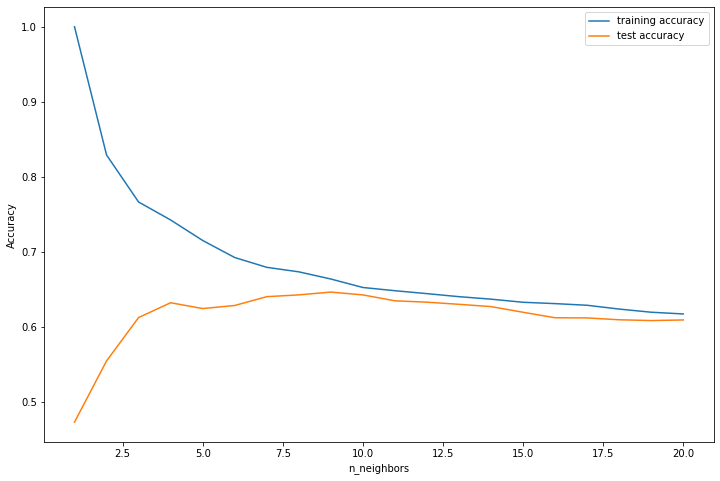

In [72]:
# Creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# Building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)

# For-loop for model
for n_neighbors in neighbors_settings:
    
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_KNN, y_train_KNN)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_KNN, y_train_KNN))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_KNN, y_test_KNN))

# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('./analysis_images/Optimal n_neighbors - Non-standardized.png')
plt.show()

In [ ]:
# Finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [73]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 9)

# FITTING to the training data
knn_fit = knn_reg.fit(X_train_KNN, y_train_KNN)

# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test_KNN)

# SCORING the results
print('KNN Training Score REG :', knn_reg.score(X_train_KNN, y_train_KNN).round(4))
print('KNN Testing Score REG  :',  knn_reg.score(X_test_KNN, y_test_KNN).round(4))

# Saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train_KNN, y_train_KNN).round(4)
knn_reg_score_test  = knn_reg.score(X_test_KNN, y_test_KNN).round(4)

# Displaying and saving the gap between training and testing
print('KNN Train-Test Gap REG :', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score REG : 0.6635
KNN Testing Score REG  : 0.646
KNN Train-Test Gap REG : 0.0175


### Standardized KNN

In [74]:
# Creating train-test-split for Standardized
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
                                                            X_scaled_df,
                                                            knn_target,
                                                            test_size = 0.25,
                                                            random_state = 219)

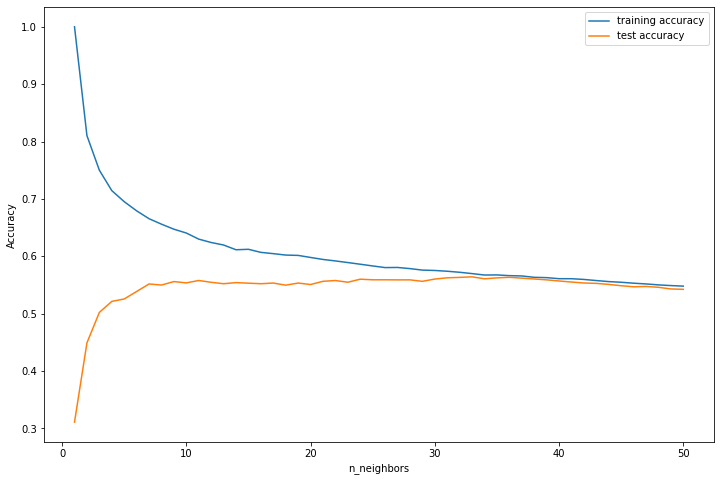

In [75]:
# Creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []

# Building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

# For-loop for knn model
for n_neighbors in neighbors_settings:
    
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))

# Plotting and saving the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('./analysis_images/Optimal n_neighbors - Standardized.png')
plt.show()

In [ ]:
# Finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [76]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = 15)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)

# SCORING the results
print('KNN Training Score STAND :', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score STAND  :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))

# Saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)

# Displaying and saving the gap between training and testing
print('KNN Train-Test Gap STAND :', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score STAND : 0.6122
KNN Testing Score STAND  : 0.5531
KNN Train-Test Gap STAND : 0.0591


## Model Comparison

In [77]:
# Comparing results
print(f"""
Model      Train Score      Test Score      Neighbors
-----      -----------      ----------      ---------
OLS        {lr_train_score}           {lr_test_score}          NA
OLS_log    {lr_train_log_score}           {lr_test_log_score}          NA        (Second best option)
Lasso      {lasso_train_score}           {lasso_test_score}          NA
ARD        {ard_train_score}           {ard_test_score}          NA
\033[1mARD_log    {ard_train_score_log}           {ard_test_score_log}          NA        (Final model choosen)\033[0m
KNN_reg    {knn_reg_score_train}           {knn_reg_score_test}          9
KNN_stand  {knn_stand_score_train}           {knn_stand_score_train}          15

\033[1mChosen final model: ARD_log\033[0m

\033[1mCoefficients ARD_log:\033[0m
('intercept', 1.99)
('Cross_sell_success', -0.01)
('Unique_meals_purch', 0.05)
('Contacts_w_customer_service', 0.04)
('Avg_meals_pc', -0.01)
('Master_classes_attended', 0.03)
('Median_meal_rating', 0.12)
('Ordered_regularly', -0.11)
('Regular_contact_w_customer_service', -0.34)
('has_Viewed_photos', -0.07)
('log_Total_meals_ordered', 0.17)
('log_Unique_meals_purch', -0.59)
('log_Contacts_w_customer_service', -0.21)
('log_Avg_time_per_site_visit', 0.01)
('log_Avg_prep_vid_time', 0.5)
('log_Total_photos_viewed', 0.03)
('log_Total_clicks_per_visit', -0.02)
('log_Median_meal_rating', -0.37)
""")

# Creating a dictionary for model results
model_performance = {
    # Model Type
    'Model Type'    : ['OLS', 'OLS_log', 'Lasso', 'ARD', 'ARD_log  (CHOSEN)', 
                       'KNN_reg', 'KNN_stand'],
    
    # Training scores
    'Training' : [lr_train_score, lr_train_log_score, lasso_train_score,
                  ard_train_score, ard_train_score_log, 
                  knn_reg_score_train, knn_stand_score_train],
     
    # Testing scores       
    'Testing'  : [lr_test_score, lr_test_log_score, lasso_test_score,
                  ard_test_score, ard_test_score_log, 
                  knn_reg_score_test, knn_stand_score_test],
          
    # Train-Test Gap scores 
    'Train-Test Gap' : [lr_test_gap, lr_test_log_gap, lasso_test_gap,
                        ard_test_gap, ard_test_gap_log, 
                        knn_reg_test_gap, knn_stand_test_gap],
      
    # Model Size  
    'Model Size' : [len(lr_lst), len(lr_lst_log), len(lasso_lst),
                    len(ard_lst), len(ard_lst_log), 'NA', 'NA'],
         
    # Model Coefficients and Variables 
    'Model' : [lr_lst, lr_lst_log, lasso_lst, ard_lst, ard_lst_log, 'NA', 'NA']}

# Converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# Sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score      Neighbors
-----      -----------      ----------      ---------
OLS        0.675           0.701          NA
OLS_log    0.7525           0.754          NA        (Second best option)
Lasso      0.7281           0.7326          NA
ARD        0.7251           0.7403          NA
ARD_log    0.7903           0.7878          NA        (Final model choosen)
KNN_reg    0.6635           0.646          9
KNN_stand  0.6122           0.6122          15

Chosen final model: ARD_log

Coefficients ARD_log:
('intercept', 1.99)
('Cross_sell_success', -0.01)
('Unique_meals_purch', 0.05)
('Contacts_w_customer_service', 0.04)
('Avg_meals_pc', -0.01)
('Master_classes_attended', 0.03)
('Median_meal_rating', 0.12)
('Ordered_regularly', -0.11)
('Regular_contact_w_customer_service', -0.34)
('has_Viewed_photos', -0.07)
('log_Total_meals_ordered', 0.17)
('log_Unique_meals_purch', -0.59)
('log_Contacts_w_customer_service', -0.21)
('log_Avg_time_per_site_visit', 0.01)
(

In [78]:
# DF with Revenue & log_Revenue, predictions, and deviations on each prediction
prediction_results = pd.DataFrame(data = {
    'Original Revenue'      : y_test,
    'Log_Revenue'           : y_test_log,
    'OLS Predictions'       : lr_pred.round(decimals = 2),
    'OLS_log Predictions'   : lr_pred_log.round(decimals = 2),
    'Lasso Predictions'     : lasso_pred.round(decimals = 2),
    'ARD Predictions'       : ard_pred.round(decimals = 2),
    'ARD_log Predictions'   : ard_pred_log.round(decimals = 2),
    'KNN_reg Prediction'    : knn_reg_pred.round(decimals = 2),
    'KNN_stand Prediction'  : knn_stand_pred.round(decimals = 2),
    'OLS Deviation'         : lr_pred.round(decimals = 2) - y_test_Onorm,
    'OLS_log Deviation'     : lr_pred_log.round(decimals = 2) - y_test_Olog,
    'Lasso Deviation'       : lasso_pred.round(decimals = 2) - y_test,
    'ARD Deviation'         : ard_pred.round(decimals = 2) - y_test,
    'ARD_log Deviation'     : ard_pred_log.round(decimals = 2) - y_test_log,
    'KNN_reg Deviations'    : knn_reg_pred.round(decimals = 2) - y_test_KNN,
    'KNN_stand Deviations'  : knn_stand_pred.round(decimals = 2) - y_test_STAND})
    
# Sending model results to Excel
prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions.xlsx',
                            index = False)